In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath('../src'))
# Plotting setup
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_context("notebook")

# Load cleaned & normalized data
tsla = pd.read_csv("../data/processed/TSLA_clean.csv", parse_dates=["Date"], index_col="Date")
spy = pd.read_csv("../data/processed/SPY_clean.csv", parse_dates=["Date"], index_col="Date")
bnd = pd.read_csv("../data/processed/BND_clean.csv", parse_dates=["Date"], index_col="Date")


In [2]:
tsla.head()

,Close,High,Low,Open,Volume,Ticker,Close_Normalized
Date,,,,,,,
2015-07-01,17.943333,18.174667,17.856667,18.073999,31518000,TSLA,0.017788
2015-07-02,18.667999,18.830000,18.220667,18.680000,107458500,TSLA,0.019329
2015-07-06,18.648001,18.779333,18.420000,18.591999,61828500,TSLA,0.019286
2015-07-07,17.858667,18.346666,17.384666,18.333332,91576500,TSLA,0.017608
2015-07-08,16.997334,17.386667,16.954000,17.288000,93316500,TSLA,0.015776


In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath('../src'))
# Plotting setup
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_context("notebook")

from eda import (
    plot_close_prices,
    compute_returns_and_volatility,
    plot_volatility_and_mean,
    detect_return_outliers,
    plot_outliers,
)

# Load cleaned data
assets = {
    "TSLA": pd.read_csv("../data/processed/TSLA_clean.csv", parse_dates=["Date"], index_col="Date"),
    "SPY": pd.read_csv("../data/processed/SPY_clean.csv", parse_dates=["Date"], index_col="Date"),
    "BND": pd.read_csv("../data/processed/BND_clean.csv", parse_dates=["Date"], index_col="Date")
}


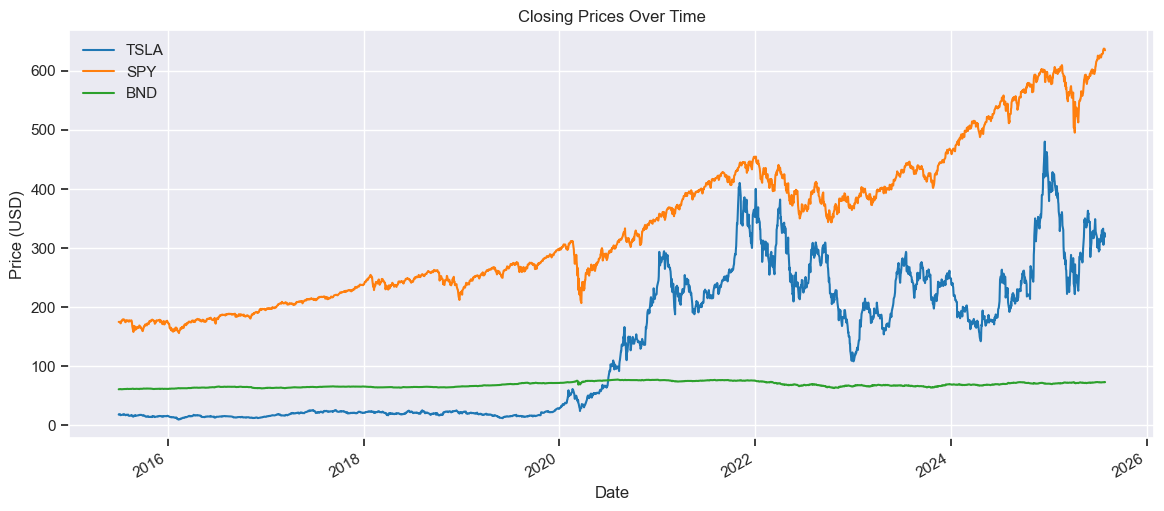

In [5]:
plot_close_prices(assets["TSLA"], assets["SPY"], assets["BND"])


In [6]:
# Update assets dictionary in-place
for key in assets:
    assets[key] = compute_returns_and_volatility(assets[key])


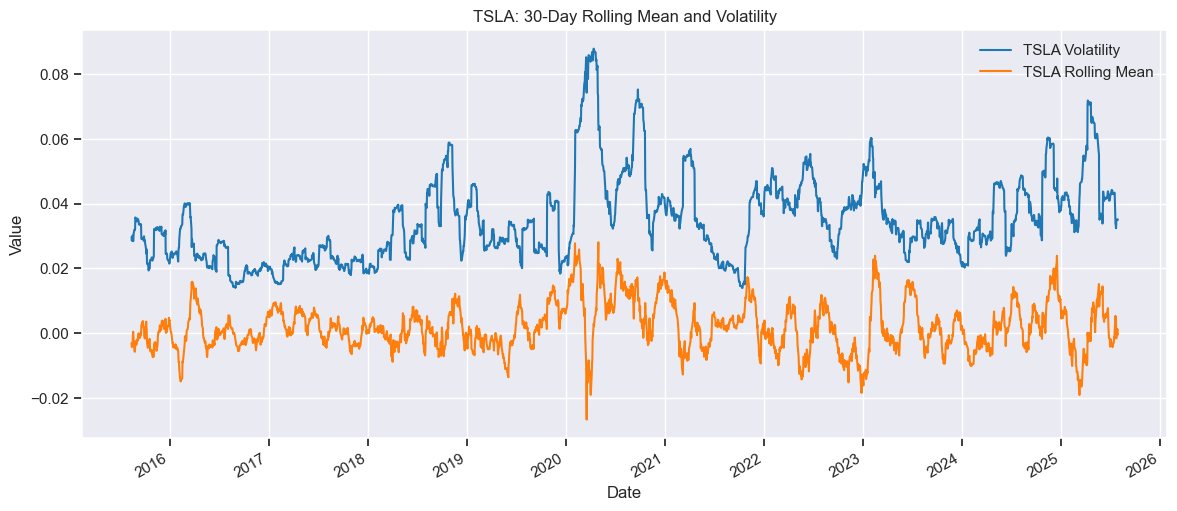

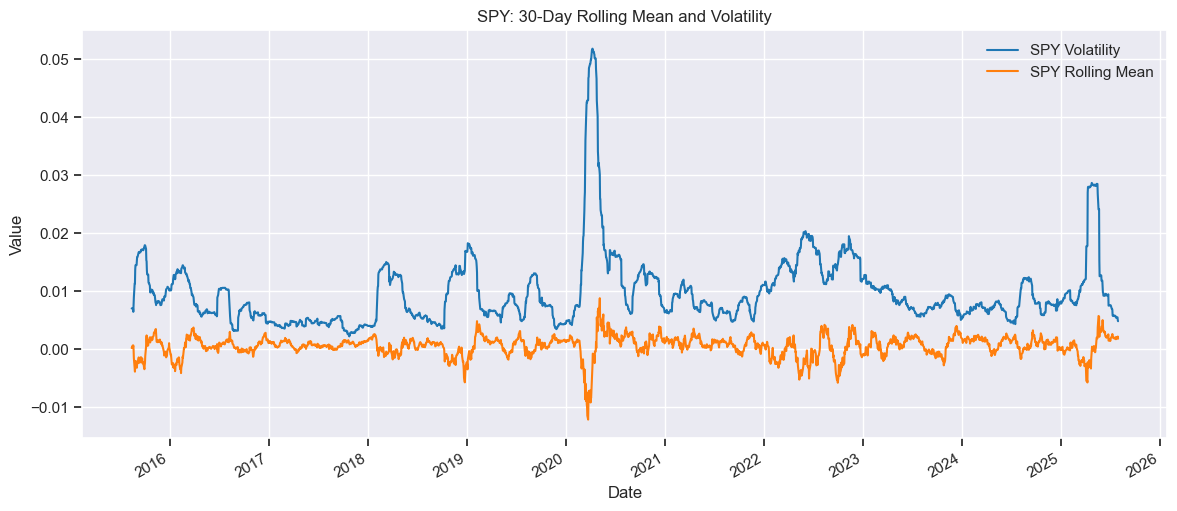

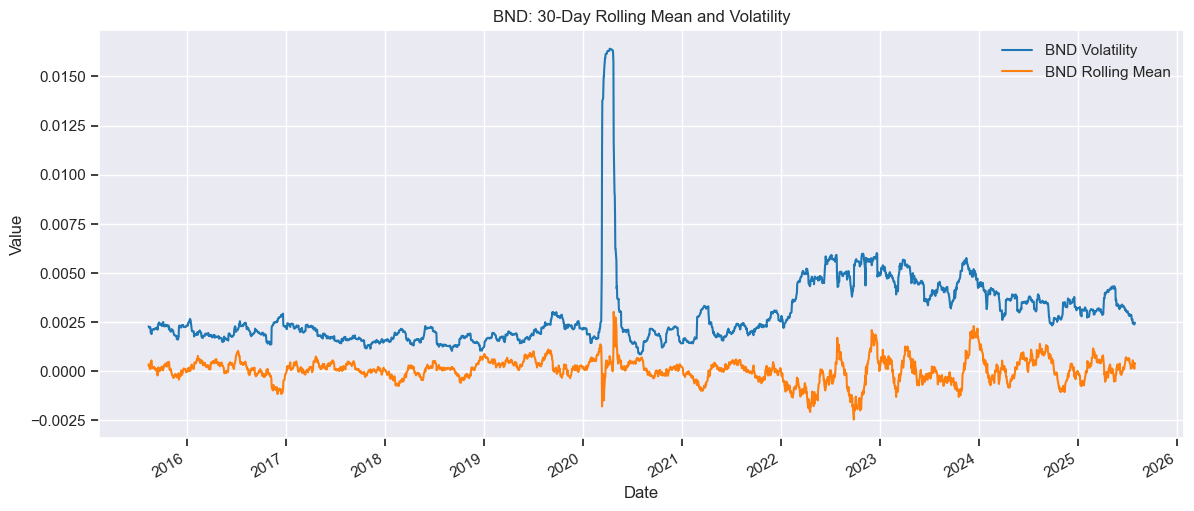

In [7]:
for key in assets:
    plot_volatility_and_mean(assets[key], key)


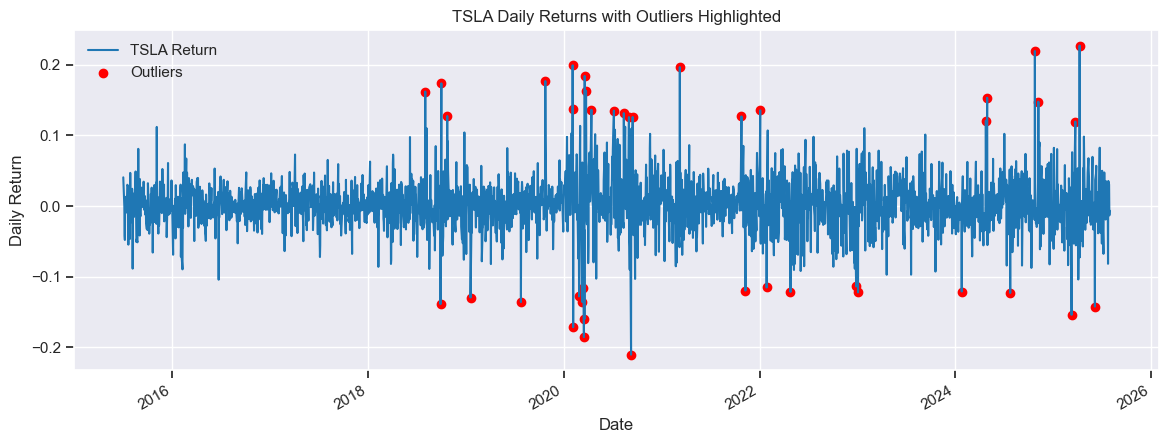

🔍 Top outliers for TSLA


,Close,Daily_Return,Return_Z
Date,,,
2025-04-09,272.200012,0.226900,6.036459
2024-10-24,260.480011,0.219190,5.829688
2020-02-03,52.000000,0.198949,5.286801
2021-03-09,224.526672,0.196412,5.218771
2020-03-19,28.509333,0.183877,4.882574


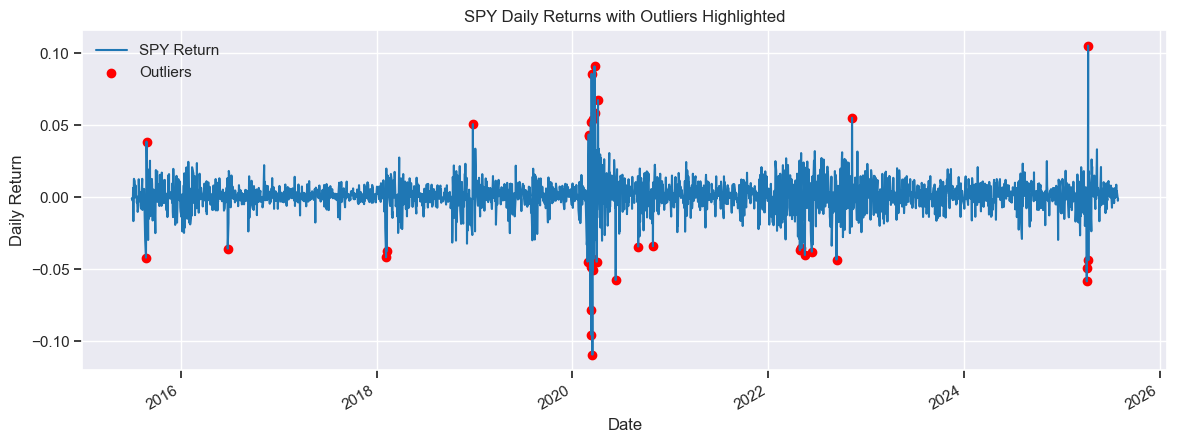

🔍 Top outliers for SPY


,Close,Daily_Return,Return_Z
Date,,,
2025-04-09,547.002930,0.105019,9.089592
2020-03-24,225.409424,0.090603,7.834991
2020-03-13,248.210571,0.085487,7.389692
2020-04-06,245.535431,0.067166,5.795307
2020-03-26,242.142487,0.058390,5.031519


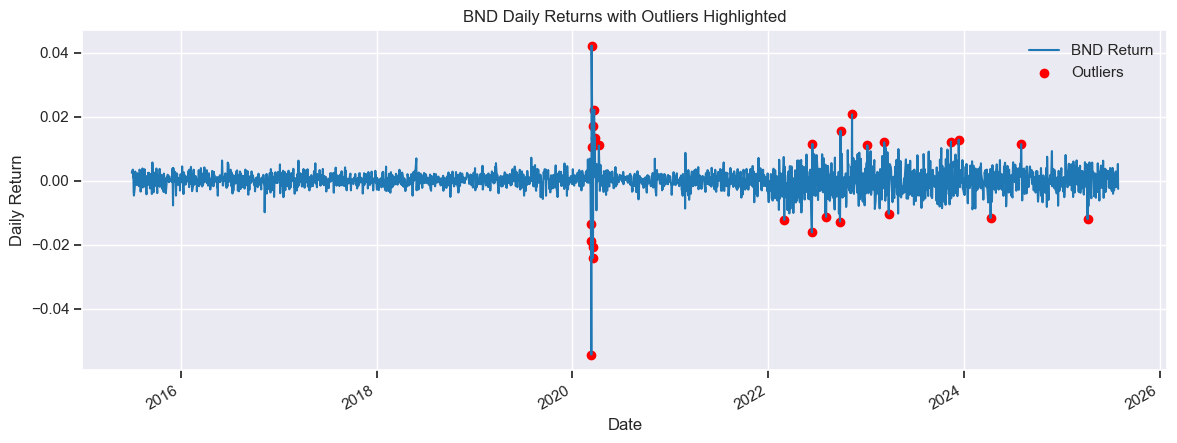

🔍 Top outliers for BND


,Close,Daily_Return,Return_Z
Date,,,
2020-03-13,71.638702,0.042201,12.175835
2020-03-23,71.869720,0.022149,6.379816
2022-11-10,65.015984,0.020702,5.961617
2020-03-20,70.312363,0.016955,4.878437
2022-09-28,65.067528,0.015544,4.470457


In [8]:
outliers_dict = {}

for key in assets:
    outliers = detect_return_outliers(assets[key])
    outliers_dict[key] = outliers
    plot_outliers(assets[key], outliers, key)
    print(f"🔍 Top outliers for {key}")
    display(outliers[['Close', 'Daily_Return', 'Return_Z']].sort_values(by='Return_Z', ascending=False).head())
